In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_boston
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Boston.csv")

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

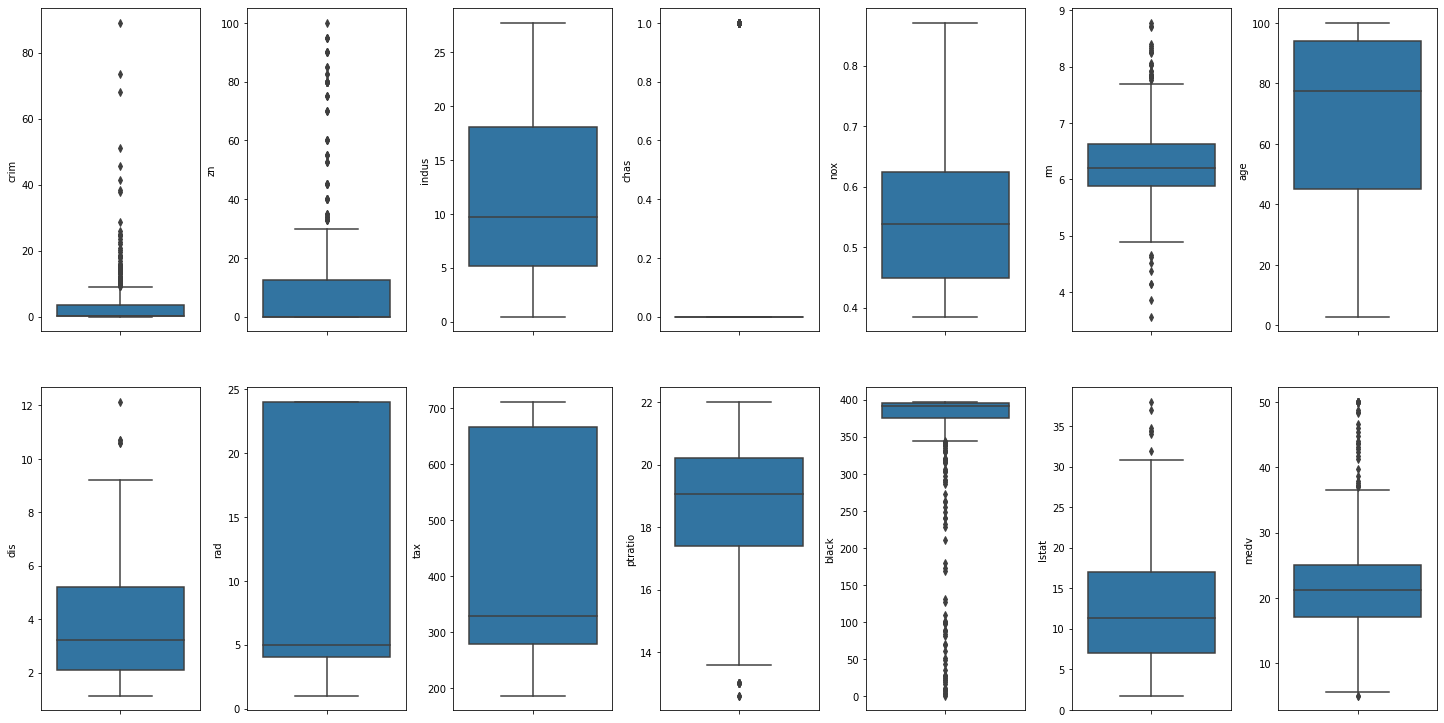

In [9]:
#EDA
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for key in df.keys():
    sns.boxplot(y=key,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

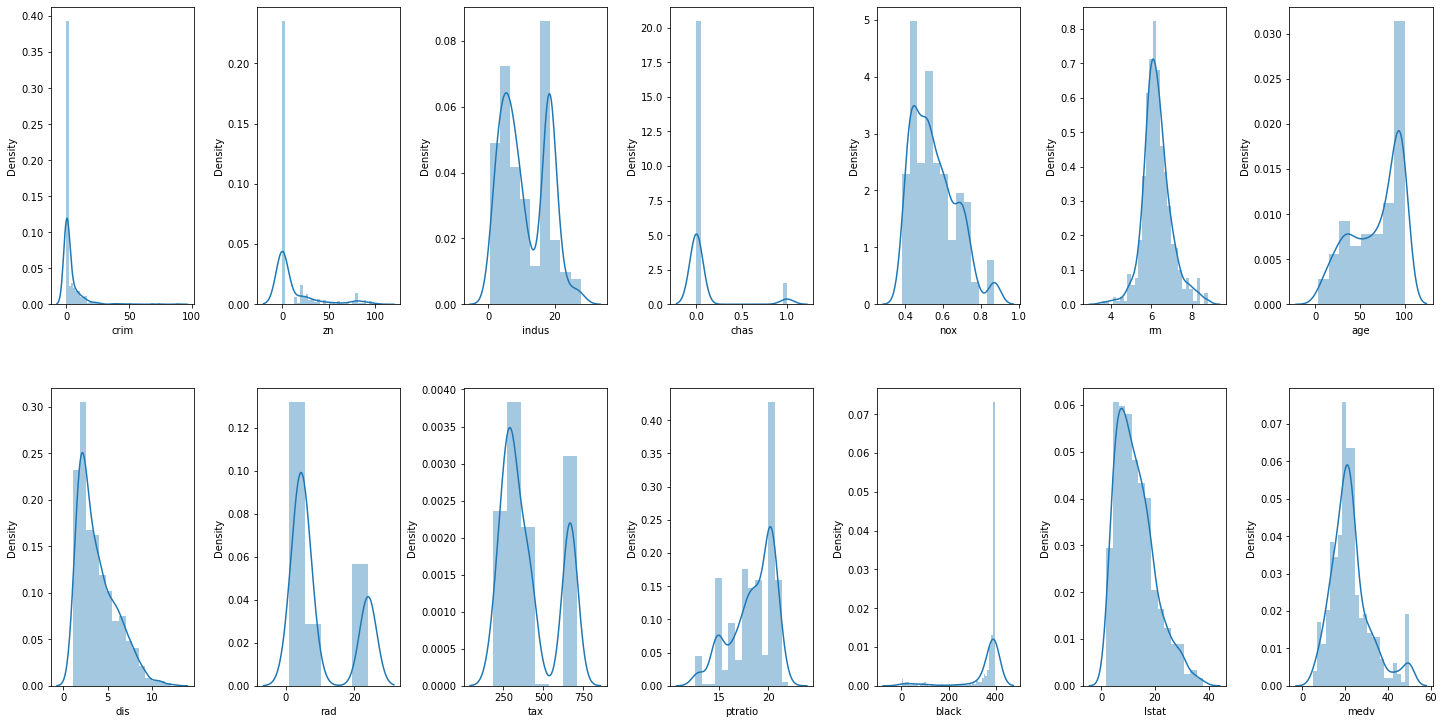

In [10]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for key,value in df.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
col=["crim","zn","tax","black"]
st_col=sc.fit_transform(df[col])
st_col=pd.DataFrame(st_col,columns=col)

In [13]:
st_col.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [14]:
for i in col:
    df[i]=st_col[i]

In [15]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2


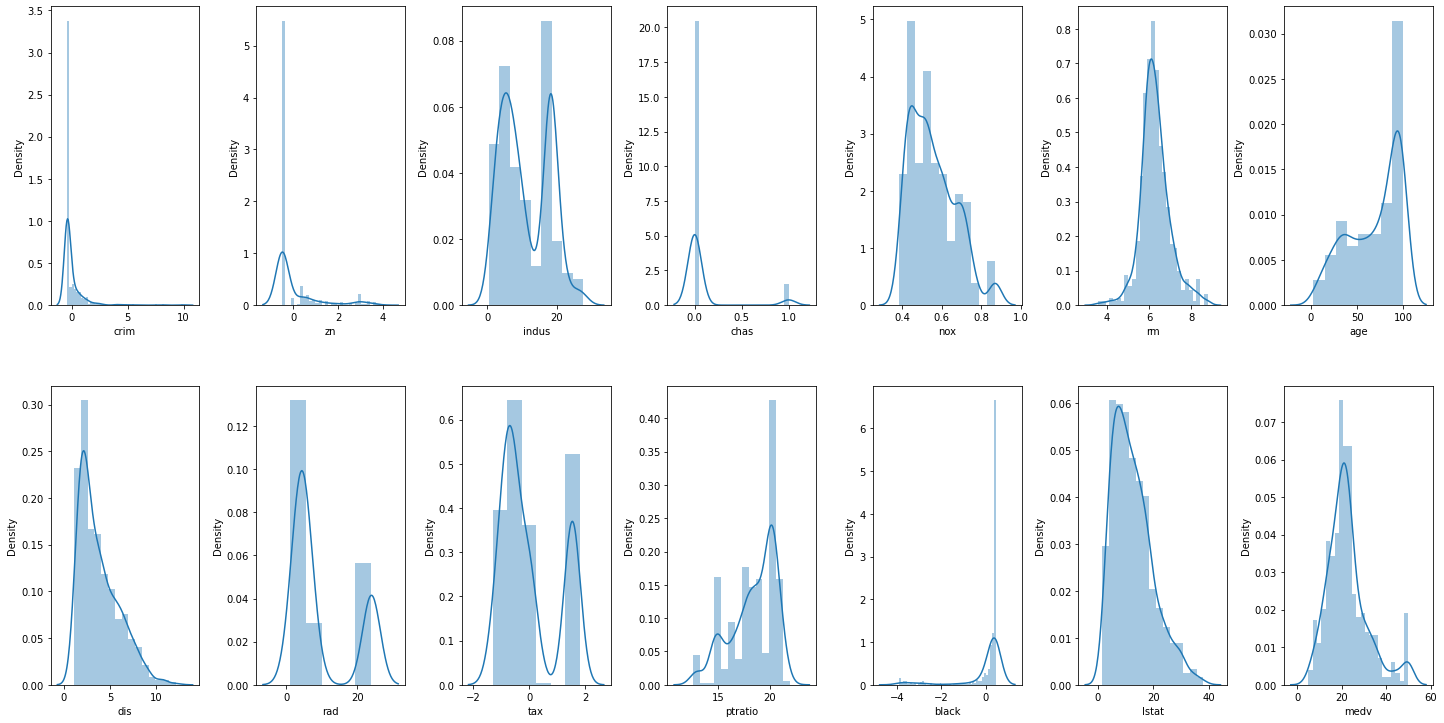

In [16]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for key,value in df.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)


In [17]:
corr=df.corr()

<AxesSubplot:>

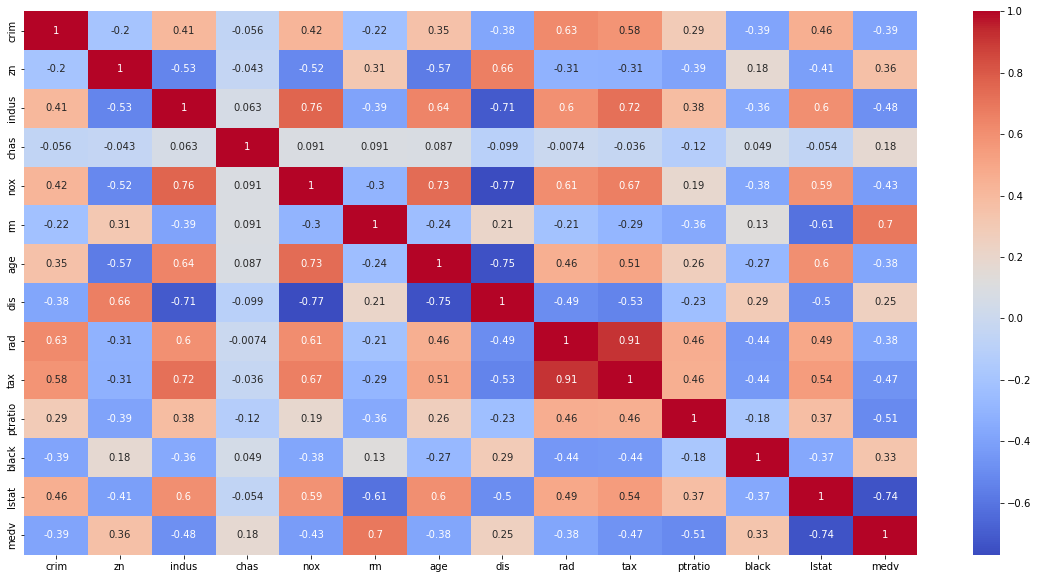

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [19]:
X=df.drop("medv",axis=1)
y=df["medv"]

In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [21]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    cv_score= cross_val_score(model,X,y,cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE: ",mean_squared_error(y_test,pred))
    print("CV_score: ",cv_score)

Model Report
MSE:  22.098694827097976
CV_score:  0.3532759243958826


<AxesSubplot:title={'center':'Model Coefficients'}>

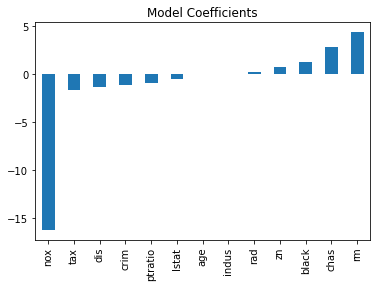

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind="bar",title="Model Coefficients")

Model Report
MSE:  10.78716535433071
CV_score:  0.03464342976910153


<AxesSubplot:title={'center':'Feature Importance'}>

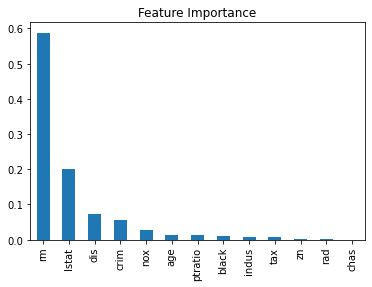

In [23]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,X,y)
coef=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar",title="Feature Importance")

Model Report
MSE:  9.792190535433072
CV_score:  0.6307917832487631


<AxesSubplot:title={'center':'Feature Importance'}>

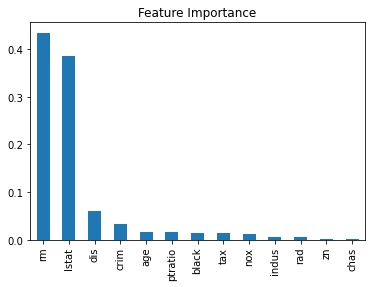

In [24]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
train(model,X,y)
coef=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar",title="Feature Importance")

Model Report
MSE:  11.810451811023626
CV_score:  0.6364674459936298


<AxesSubplot:title={'center':'Feature Importance'}>

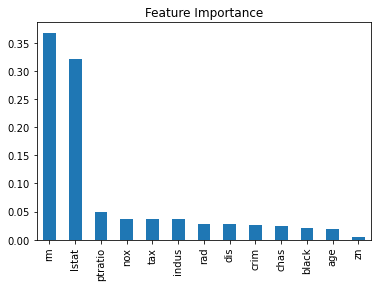

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
train(model,X,y)
coef=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar",title="Feature Importance")

Model Report
MSE:  10.060936644876671
CV_score:  0.6461118914723838


<AxesSubplot:title={'center':'Feature Importance'}>

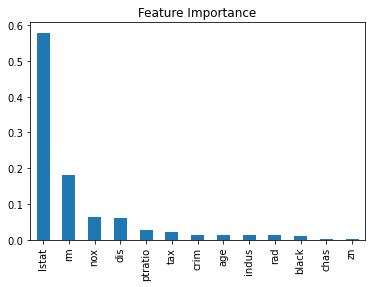

In [26]:
import xgboost as xgb
model=xgb.XGBRegressor()
train(model,X,y)
coef=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar",title="Feature Importance")